In [1]:
import os
import kaggle
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from IPython.display import display

from data_pipeline import run_pipeline

In [2]:
file_path = "../data/crime_data.sqlite"

# Check if the file exists
if os.path.exists(file_path):
    ""
else:
    run_pipeline()

Dataset URL: https://www.kaggle.com/datasets/tunguz/us-estimated-crimes
Dataset tunguz/us-estimated-crimes downloaded to data folder.
Dataset URL: https://www.kaggle.com/datasets/elijahtoumoua/chicago-analysis-of-crime-data-dashboard
Dataset elijahtoumoua/chicago-analysis-of-crime-data-dashboard downloaded to data folder.
us_estimated_crimes saved to ..\data\crime_data.sqlite.
chicago_crime_data saved to ..\data\crime_data.sqlite.


In [3]:
# Connect to the data file
conn = sqlite3.connect(file_path)

# Read the 'us_estimated_crimes and chicago_crime_data' tables into a DataFrame
us_estimated_crimes = pd.read_sql_query("SELECT * FROM us_estimated_crimes", conn)
chicago_crime_data = pd.read_sql_query("SELECT * FROM chicago_crime_data", conn)

# Close the connection
conn.close()

us_estimated_crimes_head = us_estimated_crimes.head()
chicago_crime_data_head = chicago_crime_data.head()

us_estimated_crimes_head.index = range(1, len(us_estimated_crimes_head) + 1)
chicago_crime_data_head.index = range(1, len(chicago_crime_data_head) + 1)
# Display the first few rows of the DataFrame
print("Crimes all over USA")
display(us_estimated_crimes_head)

print("Crimes in Chicago")
display(chicago_crime_data_head)

Crimes all over USA


,year,state_name,population,violent_crime,homicide,rape_legacy,robbery,property_crime,burglary,larceny,motor_vehicle_theft
1,1979,Alaska,406000,1994,54,292,445,23193,5616,15076,2501
2,1979,Alabama,3769000,15578,496,1037,4127,144372,48517,83791,12064
3,1979,Arkansas,2180000,7984,198,595,1626,70949,21457,45267,4225
4,1979,Arizona,2450000,14528,219,1120,4305,177977,48916,116976,12085
5,1979,California,22696000,184087,2952,12239,75767,1511021,496310,847148,167563


Crimes in Chicago


,date,primary_type,crime_count,arrest_count,false_count
1,2001-01-01 00:00:00,MOTOR VEHICLE THEFT,59,9,50
2,2001-01-01 00:00:00,WEAPONS VIOLATION,32,26,6
3,2001-01-01 00:00:00,DECEPTIVE PRACTICE,78,16,62
4,2001-01-01 00:00:00,CRIMINAL TRESPASS,29,17,12
5,2001-01-01 00:00:00,GAMBLING,2,2,0


In [4]:
print(chicago_crime_data.describe())
df = pd.DataFrame(us_estimated_crimes)

         crime_count   arrest_count    false_count
count  141855.000000  141855.000000  141855.000000
mean       51.594332      14.034528      37.559804
std        63.726870      25.597887      54.445958
min         1.000000       1.000000       0.000000
25%         5.000000       2.000000       1.000000
50%        29.000000       6.000000       9.000000
75%        69.000000      14.000000      52.000000
max       579.000000     559.000000     556.000000


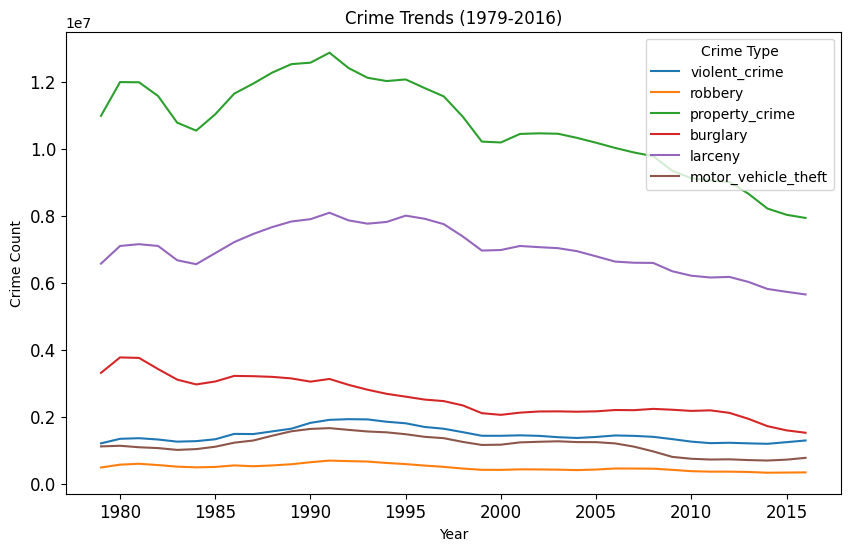

In [ ]:
total_crimes_by_year = us_estimated_crimes.groupby('year')[['violent_crime', 'robbery', 'property_crime', 'burglary', 'larceny',
       'motor_vehicle_theft']].sum()

total_crimes_by_year.plot(figsize=(10, 6))
plt.title('Crime Trends (1979-2016)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
data = us_estimated_crimes

### Goal: How specific crimes (violent crime and motor vehicle theft) have trended over time.

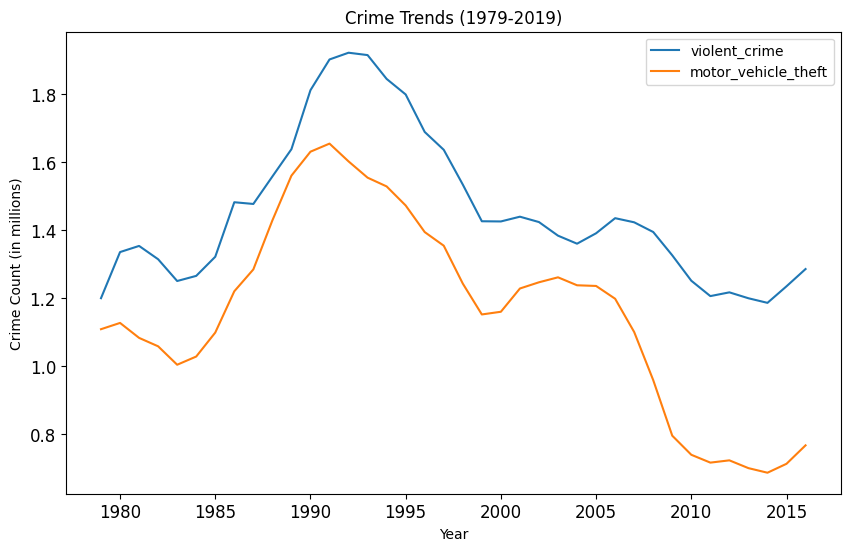

In [6]:
# Adjust values to millions
total_crimes_by_year = us_estimated_crimes.groupby('year')[['violent_crime', 'motor_vehicle_theft',]].sum()

total_crimes_by_year_in_millions = total_crimes_by_year / 1_000_000

# Plot trends
total_crimes_by_year_in_millions.plot(figsize=(10, 6))
plt.title('Crime Trends (1979-2019)')
plt.xlabel('Year')
plt.ylabel('Crime Count (in millions)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Goal: Compare crime rates across states for specific years.

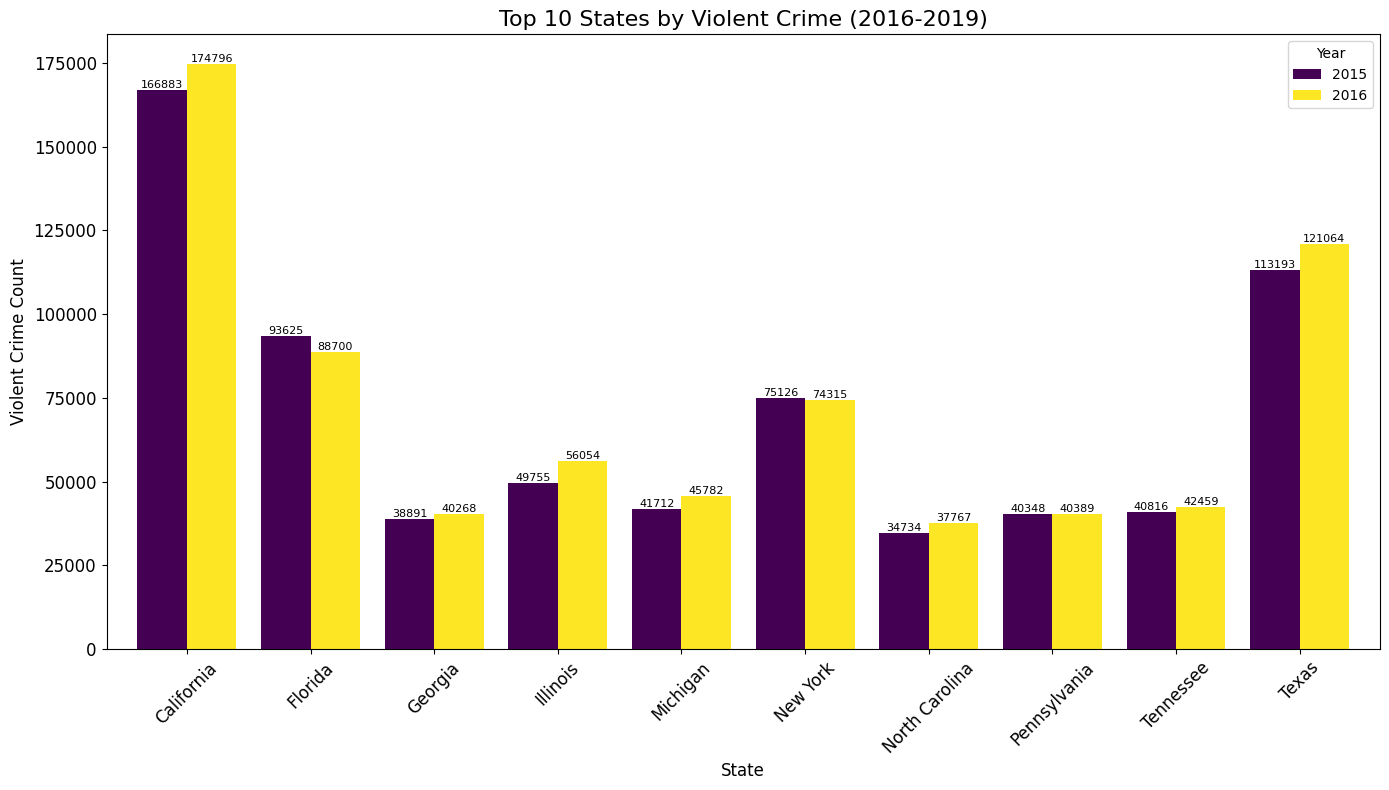

In [ ]:
data = us_estimated_crimes
# Filter data for the last 4 years
last_4_years = [2015, 2016]
filtered_data = data[data['year'].isin(last_4_years)]

top_states_by_year = (
    filtered_data.groupby('year')
    .apply(lambda x: x.sort_values(by='violent_crime', ascending=False).head(10))
    .reset_index(drop=True)
)

pivot_data = top_states_by_year.pivot(index='state_name', columns='year', values='violent_crime').fillna(0)

pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8, colormap='viridis')

plt.title('Top 10 States by Violent Crime (2016-2019)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Violent Crime Count', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

for idx, bar_group in enumerate(plt.gca().containers):
    for bar in bar_group:
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height(),                  
            f'{int(bar.get_height())}',        
            ha='center', va='bottom', fontsize=8
        )

plt.show()



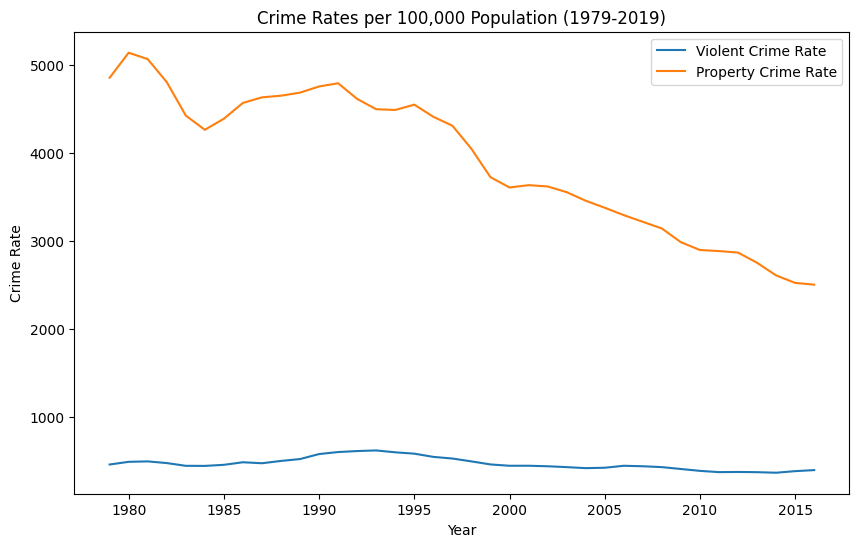

In [8]:
data['violent_crime_rate'] = data['violent_crime'] / data['population'] * 100000
data['property_crime_rate'] = data['property_crime'] / data['population'] * 100000

data.groupby('year')['violent_crime_rate'].mean().plot(figsize=(10, 6), label='Violent Crime Rate')
data.groupby('year')['property_crime_rate'].mean().plot(label='Property Crime Rate')
plt.title('Crime Rates per 100,000 Population (1979-2019)')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()

### Goal: Calculate crime rates per capita to normalize data by population.

   year  state_name  general_crime_rate
0  1979     Alabama         8224.515787
1  1979      Alaska        12111.083744
2  1979     Arizona        15352.081633
3  1979    Arkansas         6986.284404
4  1979  California        14527.172189


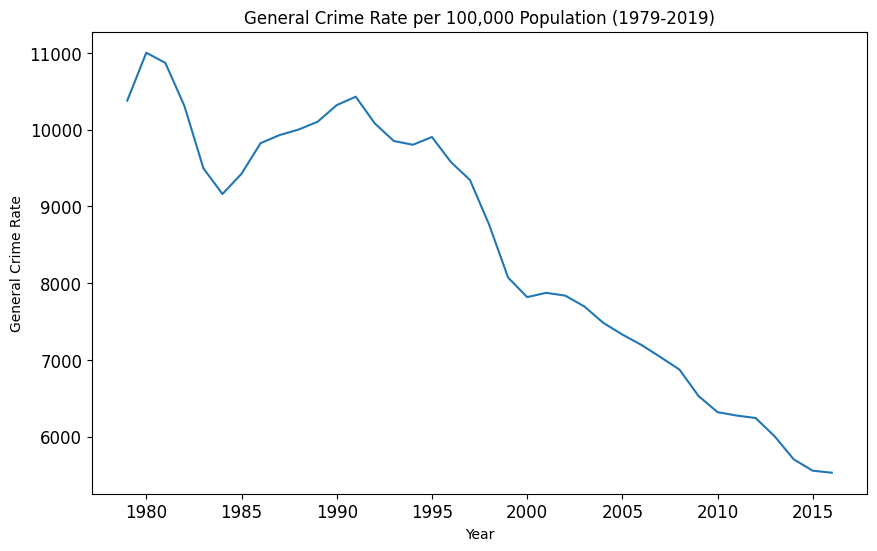

In [ ]:
aggregated_data = data.groupby(['year', 'state_name']).agg({
    'violent_crime': 'sum',
    'property_crime': 'sum',
    'homicide': 'sum',
    'rape_legacy': 'sum',
    'robbery': 'sum',
    'burglary': 'sum',
    'larceny': 'sum',
    'motor_vehicle_theft': 'sum',
    'population': 'first' 
}).reset_index()

aggregated_data['total_crimes'] = aggregated_data[['violent_crime', 'property_crime', 'homicide', 'rape_legacy', 
                                                   'robbery', 'burglary', 'larceny', 'motor_vehicle_theft']].sum(axis=1)

aggregated_data['general_crime_rate'] = (aggregated_data['total_crimes'] / aggregated_data['population']) * 100000

print(aggregated_data[['year', 'state_name', 'general_crime_rate']].head())

aggregated_data.groupby('year')['general_crime_rate'].mean().plot(figsize=(10, 6))
plt.title('General Crime Rate per 100,000 Population (1979-2019)')
plt.xlabel('Year')
plt.ylabel('General Crime Rate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Chicago Crime Data
### Goal: Visualize the distribution of crimes across different primary_type.

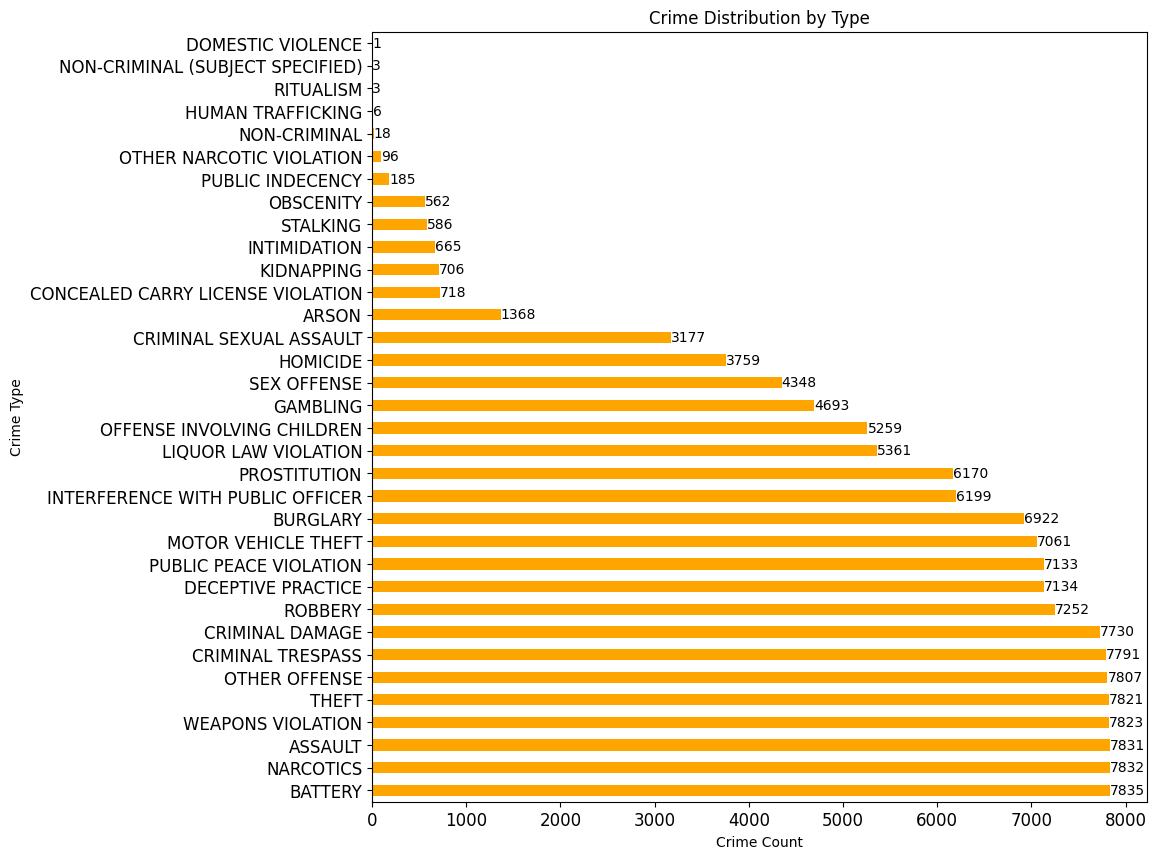

In [ ]:
crime_distribution = chicago_crime_data['primary_type'].value_counts()

ax = crime_distribution.plot(kind='barh', figsize=(10, 10), color='orange')

plt.title('Crime Distribution by Type')
plt.xlabel('Crime Count')
plt.ylabel('Crime Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',  
        ha='left',    
        fontsize=10
    )

plt.show()

### Goal: Identify seasonal patterns in crime occurrences.

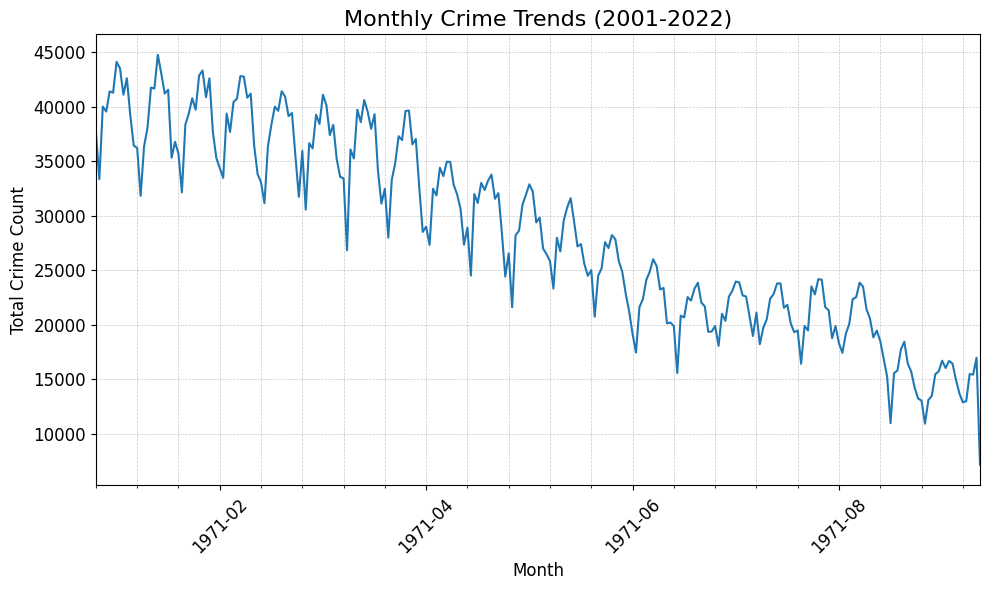

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert date to datetime and extract year-month
chicago_crime_data['month'] = pd.to_datetime(chicago_crime_data['date'], format='%Y-%m-%d %H:%M:%S').dt.to_period('M')

# Group by month
monthly_trends = chicago_crime_data.groupby('month')['crime_count'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

monthly_trends.plot(ax=ax)

plt.title('Monthly Crime Trends (2001-2022)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()



### Goal: Analyze how often arrests are made (arrest_count vs. crime_count)

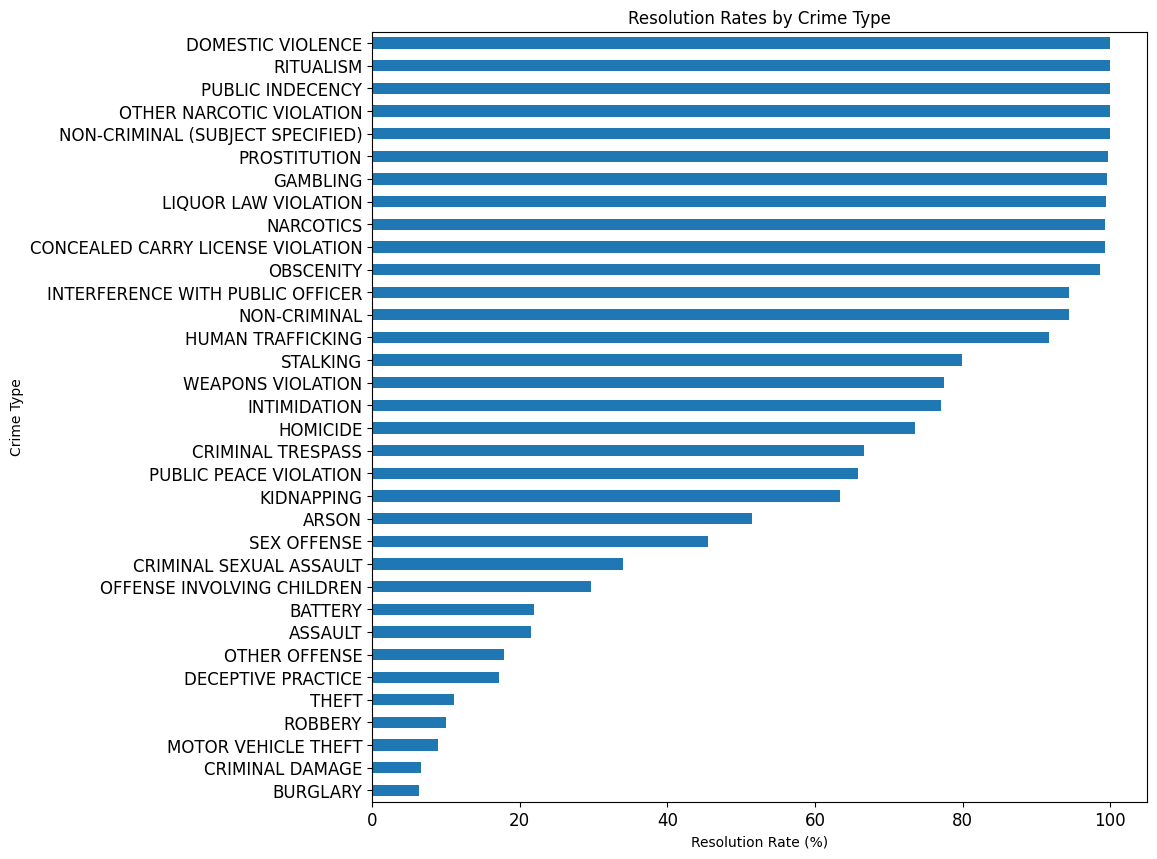

In [ ]:
chicago_crime_data['resolution_rate'] = chicago_crime_data['arrest_count'] / chicago_crime_data['crime_count'] * 100

# Average resolution rate per crime type
resolution_by_type = chicago_crime_data.groupby('primary_type')['resolution_rate'].mean().sort_values()

resolution_by_type.plot(kind='barh', figsize=(10, 10))
plt.title('Resolution Rates by Crime Type')
plt.xlabel('Resolution Rate (%)')
plt.ylabel('Crime Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


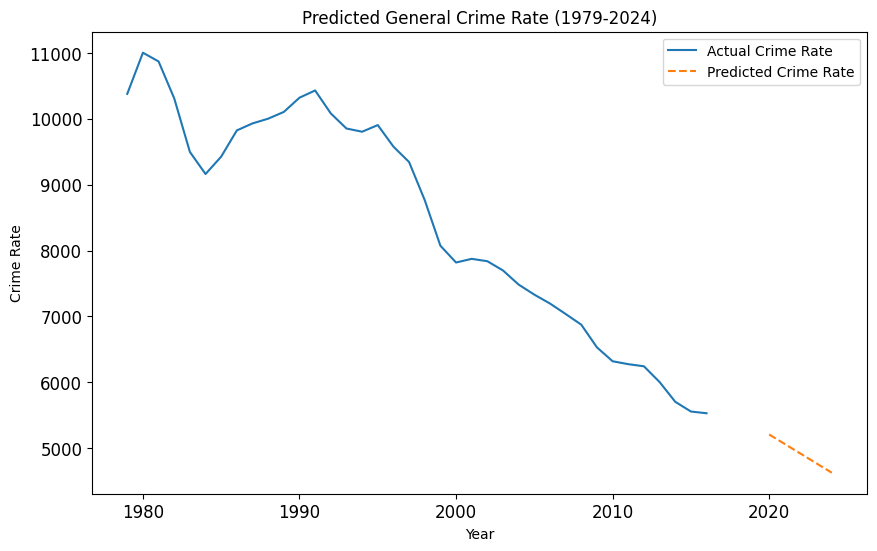

Predicted crime rates for 2020-2024: [5208.78157267 5063.69062066 4918.59966864 4773.50871663 4628.41776462]


In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

average_crime_rate = aggregated_data.groupby('year')['general_crime_rate'].mean()

X = np.array(average_crime_rate.index).reshape(-1, 1)
y = average_crime_rate.values  

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(2020, 2025)).reshape(-1, 1)
predicted_crime_rate = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(average_crime_rate.index, average_crime_rate, label='Actual Crime Rate')
plt.plot(future_years, predicted_crime_rate, label='Predicted Crime Rate', linestyle='--')
plt.title('Predicted General Crime Rate (1979-2024)')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Display predicted crime rates for 2020-2024
print(f"Predicted crime rates for 2020-2024: {predicted_crime_rate}")


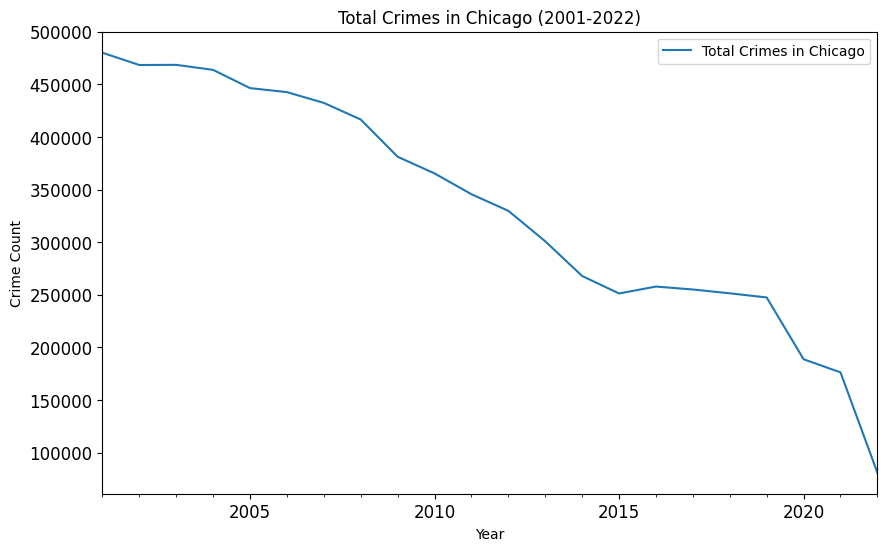

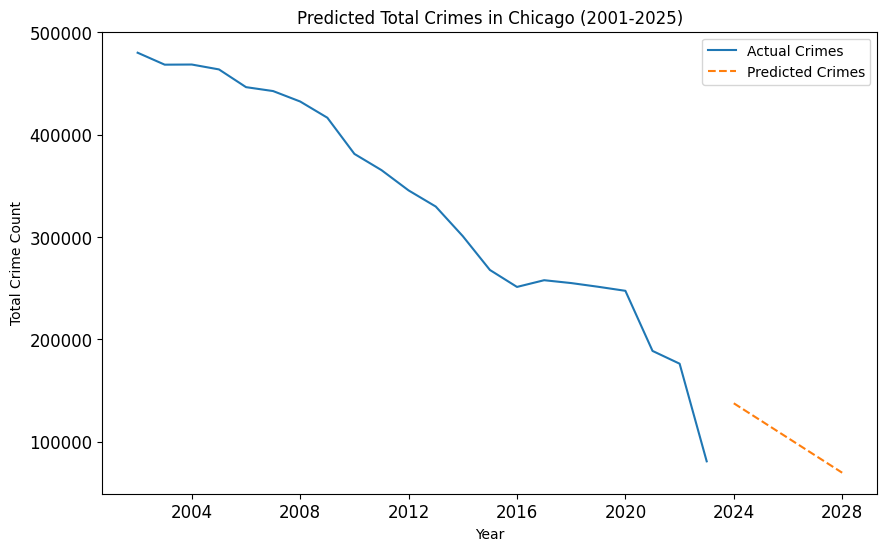

Predicted total crimes for 2023-2025: [137651.93506494 120693.15471485 103734.37436477  86775.59401468
  69816.8136646 ]


In [14]:
from sklearn.linear_model import LinearRegression

chicago_crime_data['date'] = pd.to_datetime(chicago_crime_data['date'])

chicago_crime_data.set_index('date', inplace=True)

total_crimes_chicago = chicago_crime_data['crime_count'].resample('Y').sum()

plt.figure(figsize=(10, 6))
total_crimes_chicago.plot(label='Total Crimes in Chicago')
plt.title('Total Crimes in Chicago (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

X_chicago = np.array(range(len(total_crimes_chicago))).reshape(-1, 1)
y_chicago = total_crimes_chicago.values

model_chicago = LinearRegression()
model_chicago.fit(X_chicago, y_chicago)

future_years_chicago = np.array(range(len(total_crimes_chicago), len(total_crimes_chicago) + 5)).reshape(-1, 1)
predicted_crimes_chicago = model_chicago.predict(future_years_chicago)

plt.figure(figsize=(10, 6))
plt.plot(total_crimes_chicago.index, total_crimes_chicago, label='Actual Crimes')
plt.plot(pd.date_range('2023-01-01', periods=5, freq='Y'), predicted_crimes_chicago, label='Predicted Crimes', linestyle='--')
plt.title('Predicted Total Crimes in Chicago (2001-2025)')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Display predicted total crimes for 2023-2025
print(f"Predicted total crimes for 2023-2025: {predicted_crimes_chicago}")


In [ ]:
import plotly.express as px
import pandas as pd

data['total_crimes'] = data[['violent_crime', 'property_crime', 'homicide', 'rape_legacy', 'robbery', 'burglary', 'larceny', 'motor_vehicle_theft']].sum(axis=1)

data['crime_rate'] = (data['total_crimes'] / data['population']) * 100000

fig = px.line(data_frame=data, x='year', y='crime_rate', color='state_name', title='Crime Rate per 100,000 Population (1979-2019)', labels={'crime_rate': 'Crime Rate per 100,000'})
fig.update_traces(mode='lines', line=dict(width=2))
fig.update_layout(xaxis_title='Year', yaxis_title='Crime Rate per 100,000', template='plotly_dark')

fig.show()
